# **Importing Libraries**







In [29]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

# **Loading Dataset**



In [30]:
# loading dataframe using pandas
data = pd.read_csv("data.csv")


# **EDA**







In [31]:
# getting basic information from the data.csv file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258167 entries, 0 to 258166
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   sensorId     258167 non-null  object
 1   Datetime     258167 non-null  object
 2   peopleCount  258167 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.9+ MB


Data Shape: (258167, 3)

Data Types:
sensorId       object
Datetime       object
peopleCount     int64
dtype: object

Descriptive Statistics:
         peopleCount
count  258167.000000
mean        0.526256
std         0.499311
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000

Missing Values:
sensorId       0
Datetime       0
peopleCount    0
dtype: int64

Unique Values:
sensorId         119
Datetime       23046
peopleCount        2
dtype: int64



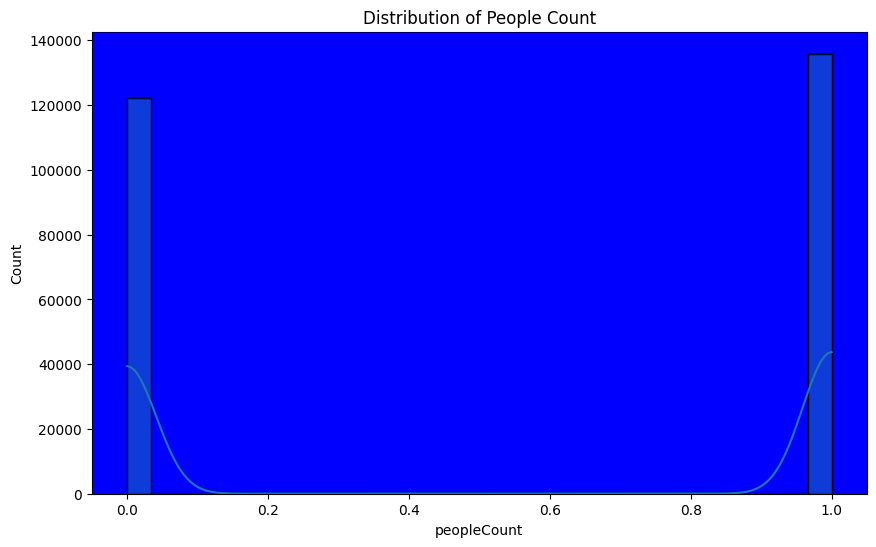

Number of Readings per Sensor:
648865e6f4f2916cab12bf06    14461
648865e6f4f2916cab12bf09    14458
648865e6f4f2916cab12bf0a    14458
6492d162014333893d8f15d5     4741
6492d162014333893d8f15c5     4741
                            ...  
648865e6f4f2916cab12bf0f       68
64932d7050181692df1e4af3       66
64932d7050181692df1e4af4       66
64932d7050181692df1e4af7        2
64932d7050181692df1e4af6        2
Name: sensorId, Length: 119, dtype: int64

Time Range: 2023-06-21 10:05:00 to 2023-07-05 12:32:00



In [32]:
# 1. Data shape (number of rows and columns)
print(f"Data Shape: {data.shape}\n")

# 2. Data types of the columns
print(f"Data Types:\n{data.dtypes}\n")

# 3. Descriptive statistics of numeric columns
print(f"Descriptive Statistics:\n{data.describe()}\n")

# 4. Checking for missing values
print(f"Missing Values:\n{data.isnull().sum()}\n")

# 5. Unique values in each column
print(f"Unique Values:\n{data.nunique()}\n")

# 6. Distribution of `peopleCount` values
plt.figure(figsize=(10, 6))
sns.histplot(data['peopleCount'], bins=30, kde=True)
plt.title('Distribution of People Count')
plt.show()

# 7. Number of readings per sensor (`sensorId`)
sensor_counts = data['sensorId'].value_counts()
print(f"Number of Readings per Sensor:\n{sensor_counts}\n")

# 8. Time range of the readings
data['Datetime'] = pd.to_datetime(data['Datetime'])
print(f"Time Range: {data['Datetime'].min()} to {data['Datetime'].max()}\n")

Dataset Information

- Number of Rows: 258,167
- Number of Columns: 3

- Column Data Types:
  - `sensorId`: Object
  - `Datetime`: Object
  - `peopleCount`: Integer

- Summary Statistics:
  - `peopleCount`:
    - Range: 0 to 1
    - Mean: Approximately 0.526 (indicating that more than half of the sensor readings detected at least one person)

- Missing Values: None

- Unique Values:
  - `sensorId`: 119
  - `Datetime`: 23,046
  - `peopleCount`: 2 (0 and 1)

- Distribution of `peopleCount`: Approximately balanced between 0 and 1

- Readings per Sensor: Varies significantly, with the sensor with the most readings having 14,461 and some sensors having as few as 2 readings.

- Time Range: June 21, 2023, to July 5, 2023



#**checking and handling duplicates**

In [33]:
# Check for duplicate rows with the same sensorId and Datetime
duplicates = data.duplicated(subset=['sensorId', 'Datetime'], keep=False)
any_duplicates = duplicates.any()
any_duplicates


True

In [34]:
# Display the duplicate rows with the same sensorId and Datetime
df_duplicates = data[data.duplicated(subset=['sensorId', 'Datetime'], keep=False)]
df_duplicates.sort_values(['sensorId', 'Datetime'], inplace=True)
df_duplicates


<ipython-input-34-4ee26e7f5721>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates.sort_values(['sensorId', 'Datetime'], inplace=True)


,sensorId,Datetime,peopleCount
938,648865e6f4f2916cab12bef6,2023-06-27 05:44:23,1
939,648865e6f4f2916cab12bef6,2023-06-27 05:44:23,1
964,648865e6f4f2916cab12bef6,2023-06-27 05:44:23,1
987,648865e6f4f2916cab12bef6,2023-06-27 05:46:22,1
992,648865e6f4f2916cab12bef6,2023-06-27 05:46:22,1
...,...,...,...
153701,64932d7050181692df1e4af5,2023-07-03 09:36:33,0
153703,64932d7050181692df1e4af5,2023-07-03 09:36:33,0
153670,64932d7050181692df1e4af5,2023-07-03 09:38:33,0
153672,64932d7050181692df1e4af5,2023-07-03 09:38:33,0


In [35]:
data = data.drop_duplicates(subset=['sensorId', 'Datetime'])

In [36]:
data.shape

(184238, 3)

Removal of Duplicate Entries

- After dropping the duplicate entries based on 'sensorId' and 'Datetime', the dataset now contains 184,238 rows and 3 columns.

- This indicates that there were 73,929 duplicate rows in the original dataset. By removing these duplicates, we ensure that each sensor's reading at a specific timestamp is represented only once in the dataset, eliminating any potential redundancy or incorrect aggregation of data.



#**Datetime conversion**

Converting Datetime to Datetime Data Type for Time Series Analysis

- To perform time series analysis effectively, it is crucial to ensure that the Datetime column is in the appropriate datetime data type rather than being treated as a string (object type). Converting the Datetime column to a datetime data type and setting it as the index of the DataFrame is a common practice when working with time series data.

- By converting the Datetime column to a datetime data type, we enable various time-based operations and calculations, such as resampling, filtering, and time-based indexing. This conversion allows us to leverage the inherent properties of time series data and unlock the full potential of time-based analysis.


In [37]:
# Convert the 'Datetime' column to datetime format and set it as the index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Check the first few rows of the updated data
data.head()


<ipython-input-37-3c1856d505d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datetime'] = pd.to_datetime(data['Datetime'])


,sensorId,peopleCount
Datetime,,
2023-06-27 08:02:23,648865e6f4f2916cab12bef6,0
2023-06-27 10:42:21,648865e6f4f2916cab12bef6,1
2023-07-04 08:30:22,648865e6f4f2916cab12bef6,1
2023-07-04 06:44:22,648865e6f4f2916cab12bef6,1
2023-06-27 10:40:22,648865e6f4f2916cab12bef6,1


#**Insights**

In [38]:
# Basic statistical analysis
people_stats = data['peopleCount'].describe()

# Number of unique sensor IDs
num_unique_sensors = data['sensorId'].nunique()

print(people_stats)
print("")
print("unique sensor count:" , num_unique_sensors)


count    184238.000000
mean          0.665324
std           0.471878
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: peopleCount, dtype: float64

unique sensor count: 119


Insights from the Dataset


- The `peopleCount` column still ranges from 0 to 1, but the mean has slightly increased to approximately 0.665. This indicates that there are more instances of `peopleCount` being 1 after removing the duplicate entries.

- Additionally, there are 119 unique sensor IDs in the dataset.









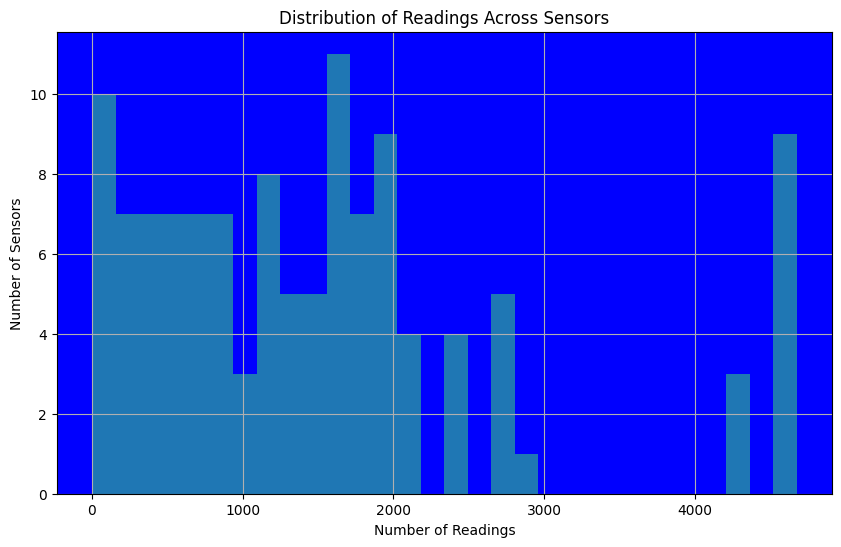

count     119.000000
mean     1548.218487
std      1250.454806
min         2.000000
25%       587.000000
50%      1349.000000
75%      1940.000000
max      4673.000000
Name: sensorId, dtype: float64

In [39]:
# Count the number of readings from each sensor
sensor_counts = data['sensorId'].value_counts()

# Plot a histogram of the sensor counts
plt.figure(figsize=(10, 6))
plt.hist(sensor_counts, bins=30)
plt.xlabel('Number of Readings')
plt.ylabel('Number of Sensors')
plt.title('Distribution of Readings Across Sensors')
plt.grid(True)
plt.show()

# Show statistics about the sensor counts
sensor_counts.describe()


Distribution of Readings across Sensors:




*   The histogram displays the distribution of the number of readings across different sensors.
*   It shows that most sensors have between 0 and 1000 readings, with a few sensors having more than 4000 readings.
* This might indicate that some sensors have been active for a longer time or that some areas have a higher frequency of monitoring. **(OUTLIER)**

Descriptive Statistics:


- These statistics reveal a wide variation in the number of readings per sensor. The dataset includes 119 unique sensors, with an average of approximately 1548 readings per sensor. The standard deviation of around 1250 indicates significant variability in the number of readings among sensors.

- The minimum number of readings from a sensor is 2, while the maximum is 4673. The 25th percentile (587) and the 75th percentile (1940) demonstrate the distribution of readings across sensors, highlighting the diversity in data availability and collection frequency.

- These insights emphasize the importance of considering the varying number of readings when analyzing the dataset and interpreting the results.





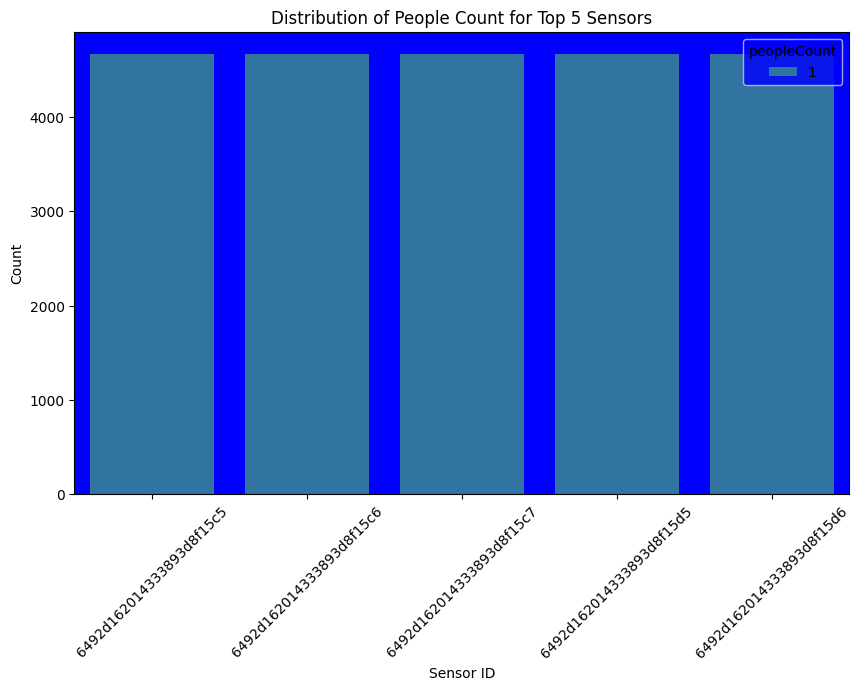

In [40]:
# # Get the top 5 sensors with the most records

sensor_readings_count = data['sensorId'].value_counts()
# Get the IDs of the top 5 sensors with the most readings
top_5_sensors = sensor_readings_count.head(5).index

# Filter the dataframe to include only readings from the top 5 sensors
df_top_5_sensors = data[data['sensorId'].isin(top_5_sensors)]

# Plot the distribution of peopleCount for each of the top 5 sensors
plt.figure(figsize=(10, 6))
sns.countplot(x='sensorId', hue='peopleCount', data=df_top_5_sensors)
plt.title('Distribution of People Count for Top 5 Sensors')
plt.xlabel('Sensor ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Insights from the Plots

- The plots display the distribution of `peopleCount` (number of people detected) for the top 5 sensors with the most readings. It is interesting to note that some sensors consistently detect at least one person (`peopleCount = 1`), while others exhibit more balanced readings.

- The variability in the number of readings per sensor can be attributed to several factors, including sensor reliability, sensor location (with certain areas potentially experiencing higher activity levels), and the duration of sensor operation. Furthermore, the variation in `peopleCount` suggests differences in the level of activity in the areas monitored by the sensors.

- These observations provide valuable insights into the distribution of `peopleCount` and highlight the potential influence of various factors on the readings.


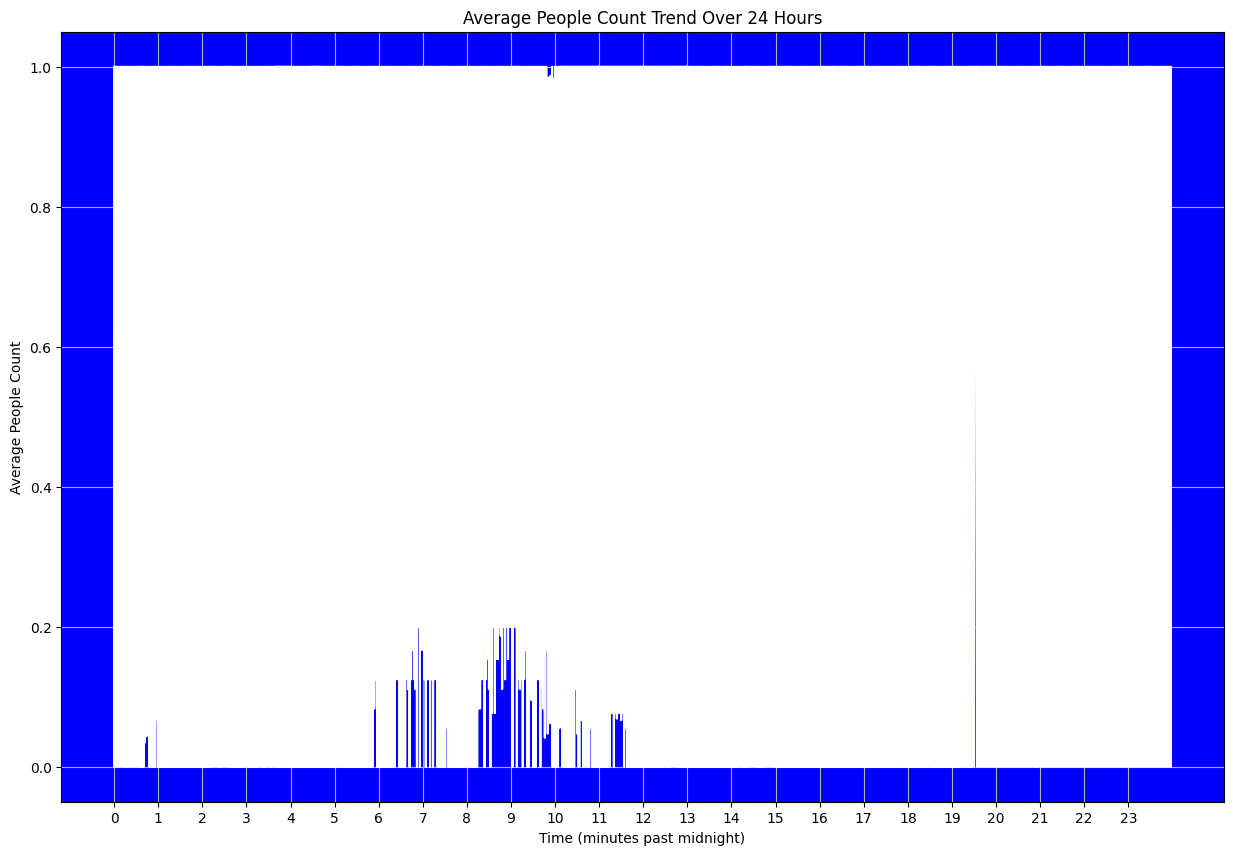

In [41]:
#converting these times to numbers representing the number of minutes past midnight,
#which should make the plotting possible. For example, 1:30 PM would be converted to
#810 minutes (13 hours * 60 minutes/hour + 30 minutes).

# Set the background color to white
plt.rcParams['axes.facecolor'] = 'blue'

# Extract the time from the Datetime index
data['Time'] = data.index.time

# Group by time and calculate the average peopleCount
average_trend = data.groupby('Time')['peopleCount'].mean()



# Convert the Time index to minutes past midnight
average_trend.index = [time.hour * 60 + time.minute for time in average_trend.index]

# Plot the average trend
plt.figure(figsize=(15, 10))
plt.plot(average_trend.index, average_trend.values, color = 'white')
plt.xlabel('Time (minutes past midnight)')
plt.ylabel('Average People Count')
plt.title('Average People Count Trend Over 24 Hours')
plt.grid(True)
plt.xticks(ticks=range(0, 24*60, 60), labels=range(24))
plt.show()


Insights from the Plot

* The plot depicts the average `peopleCount` over a 24-hour period, with the x-axis representing time in hours past midnight. The trend displayed indicates that the average count of people detected by the sensors fluctuates throughout the day, aligning with the expected daily cycle of human activity.

* More specifically, the people count appears to be higher during the daytime, roughly between 5 AM and 10 PM. In contrast, it is lower during the late night and early morning hours. This pattern is consistent with typical daily routines, where people are most active and present during the day and tend to be less active during the night.

* These observations provide insight into the temporal variation in `peopleCount` and highlight the diurnal nature of human activity.


In [42]:
filename = str(input("enter the filename for the new data file: "))
filename = filename+".csv"
data.to_csv(filename, index=True)

enter the filename for the new data file: up
